In [1]:
# Installs that we need
#!pip install FlowCal
#!pip install umap-learn


In [1]:
# Imports

import sys
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import FlowCal
from umap import UMAP
from sklearn.decomposition import PCA
np.random.seed(1)

In [31]:
# Read in levine data

data_dir = "LevineData/"
levine_fn = data_dir + "Levine_32dim_notransform.fcs"
levine = FlowCal.io.FCSData(levine_fn)

# Find relevant labels
print(levine.shape)
print(levine.channels)
# Columns 4-36 (0-indexed) are relevant markers
# column 39 (0-indexed) is labels

# 60% of the dataset is garbage
non_garbage_idx = np.where(np.isnan(levine[:, 39]) == False)
levine = levine[non_garbage_idx]

levine = levine[:, 4:36]
print(levine.shape)
print(levine.channels)

# Transform data with arcsinh
levine = np.arcsinh(np.array(levine))



(265627, 41)
('Time', 'Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133', 'CD19', 'CD22', 'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4', 'CD235ab', 'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c', 'CD7', 'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117', 'CD49d', 'HLA-DR', 'CD64', 'CD41', 'Viability', 'file_number', 'event_number', 'label', 'individual')
(104184, 32)
('CD45RA', 'CD133', 'CD19', 'CD22', 'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4', 'CD235ab', 'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c', 'CD7', 'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117', 'CD49d', 'HLA-DR', 'CD64', 'CD41')


In [33]:
# Perform UMAP
DR = UMAP(n_neighbors=15,min_dist=0.2,metric="euclidean",verbose=True,random_state=123)
levine_umap = DR.fit_transform(levine)
np.save("levine_umap", levine_umap)

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.2, random_state=123,
     verbose=True)
Construct fuzzy simplicial set
Thu May  6 21:39:58 2021 Finding Nearest Neighbors
Thu May  6 21:39:58 2021 Building RP forest with 21 trees
Thu May  6 21:39:59 2021 NN descent for 17 iterations
	 1  /  17
	 2  /  17
<NULL> 3 <NULL> 17
<NULL> 4 <NULL> 17
<NULL> 5 <NULL> 17
<NULL> 6 <NULL> 17
<NULL> 6 <NULL>


SystemError: CPUDispatcher(<function nn_descent at 0x000002179C1DFB70>) returned a result with an error set

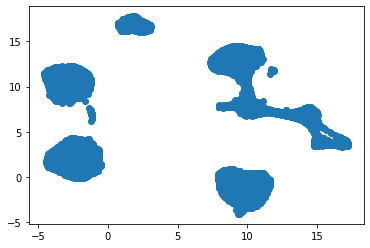

In [34]:
# Plot UMAP results
plt.scatter(levine_umap[:, 0], levine_umap[:, 1])

In [35]:
# Perform tSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_iter=1000,verbose=True,n_jobs=-1)
levine_tsne = tsne.fit_transform(levine)
np.save("levine_tsne", levine_tsne)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 104184 samples in 0.007s...
[t-SNE] Computed neighbors for 104184 samples in 415.517s...
[t-SNE] Computed conditional probabilities for sample 1000 / 104184
[t-SNE] Computed conditional probabilities for sample 2000 / 104184
[t-SNE] Computed conditional probabilities for sample 3000 / 104184
[t-SNE] Computed conditional probabilities for sample 4000 / 104184
[t-SNE] Computed conditional probabilities for sample 5000 / 104184
[t-SNE] Computed conditional probabilities for sample 6000 / 104184
[t-SNE] Computed conditional probabilities for sample 7000 / 104184
[t-SNE] Computed conditional probabilities for sample 8000 / 104184
[t-SNE] Computed conditional probabilities for sample 9000 / 104184
[t-SNE] Computed conditional probabilities for sample 10000 / 104184
[t-SNE] Computed conditional probabilities for sample 11000 / 104184
[t-SNE] Computed conditional probabilities for sample 12000 / 104184
[t-SNE] Computed conditional proba

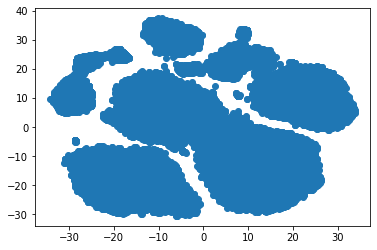

In [36]:
# Plot tSNE results
plt.scatter(levine_tsne[:, 0], levine_tsne[:, 1])

In [37]:
#Run PCA
pca = PCA()
levine_pca = pca.fit_transform(levine)
np.save("levine_pca", levine_pca)

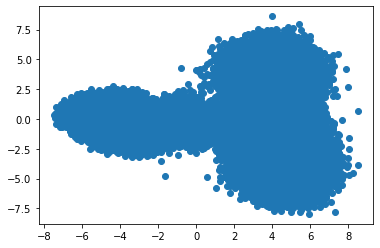

In [38]:
plt.scatter(levine_pca[:, 0], levine_pca[:, 1])